## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error, r2_score

In [7]:
download_path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", download_path)


Path to dataset files: C:\Users\abjar\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [8]:
# Load the dataset from the downloaded path
df= pd.read_csv(f"{download_path}/hour.csv")

# Display first few rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Clean and pre-process the dataset as required and prepare the data for modelling.

In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Check for missing values
print("Missing Values:", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().count())

Missing Values: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Rows: 17379


i have decided to drop, instant, as it is just for indexing and not usable for modeling, also, im also dropping both casual and registered, as im only interested in the full count 

In [11]:
# Convert dteday to datetime format (but keep it as a column)
df["dteday"] = pd.to_datetime(df["dteday"])

# Drop unnecessary columns
df.drop(columns=["instant", "casual", "registered"], inplace=True)

# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB


Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.

for lag functions i have decided to go with 1h, 1d, 7d, and 30d, these help capture stuff like short term demand, daily patterns, weekly patterns like weekdays vs weekend, and lastly capturing seasonality, checking fluctiuations in demand with weather, holidays, etc.

for rolling mean i went with 3h, 6h, and 7d. they help with capturing short term demand and morning vs evening demand, and weekly changes in demand. 

lastly since these functions create some missing values in the beginning of the dataset, i fill the missing values with 0s

In [12]:
# Create Lag Features
df["cnt_lag_1h"] = df["cnt"].shift(1)  # 1 hour - useful for short term demand
df["cnt_lag_1d"] = df["cnt"].shift(24)  # 24 hours - for daily patterns, commuting hours and stuff
df["cnt_lag_7d"] = df["cnt"].shift(24*7)  # 7 days - captures weekly patterns, monday to friday commuting vs weekend leisure rides 
df["cnt_lag_30d"] = df["cnt"].shift(24*30)  # 30 days - captures seasonality, checking fluctuations in demand with weather or holidays for example 

# Create Rolling Mean Features
df["cnt_roll_3h"] = df["cnt"].rolling(window=3).mean() # Last 3 hours - helps smooth random fluctuations
df["cnt_roll_6h"] = df["cnt"].rolling(window=6).mean() # last 6 hours - helps compare morning vs evening demand
df["cnt_roll_7d"] = df["cnt"].rolling(window=24*7).mean()  # last 7 days - identifies weekly rental cycles 
# Verify new features
df.head()

df.fillna(0, inplace=True)

# Check the new features
df.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,cnt,cnt_lag_1h,cnt_lag_1d,cnt_lag_7d,cnt_lag_30d,cnt_roll_3h,cnt_roll_6h,cnt_roll_7d
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,0.81,0.0,16,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,0.80,0.0,40,16.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,0.80,0.0,32,40.0,0.0,0.0,0.0,29.333333,0.0,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,0.75,0.0,13,32.0,0.0,0.0,0.0,28.333333,0.0,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,0.75,0.0,1,13.0,0.0,0.0,0.0,15.333333,0.0,0.0


Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [21]:
features = [col for col in df.columns if col not in ["cnt", "dteday"]]
target = "cnt"

X = df[features]
y = df["cnt"]

test_size = 24 * 7 #final week

# Train-Test Split
X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]

# Print dataset sizes to confirm
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (17211, 19)
Test set size: (168, 19)


In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Depth of the trees
    'learning_rate': 0.01,  # Learning rate
    'colsample_bytree': 0.8,  # Subsample of features
    'subsample': 0.8  # Subsample ratio
}

watchlist = [(dtrain, 'train'), (dtest, 'eval')]

num_round = 1000  # Number of boosting rounds
early_stopping_rounds = 50  # Early stopping

reg = xgb.train(params, dtrain, num_round, watchlist, early_stopping_rounds=early_stopping_rounds,verbose_eval=100)

y_pred_xgb = reg.predict(dtest)


[0]	train-rmse:180.31731	eval-rmse:135.66675


c:\Users\abjar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[100]	train-rmse:91.47233	eval-rmse:63.54666
[200]	train-rmse:62.92528	eval-rmse:42.22567
[300]	train-rmse:52.96873	eval-rmse:34.92615
[400]	train-rmse:48.44719	eval-rmse:31.98732
[500]	train-rmse:45.44360	eval-rmse:30.13758
[600]	train-rmse:43.51091	eval-rmse:28.79088
[700]	train-rmse:41.75116	eval-rmse:27.36691
[800]	train-rmse:40.36388	eval-rmse:26.75105
[900]	train-rmse:39.38754	eval-rmse:26.52922
[999]	train-rmse:38.34535	eval-rmse:26.38441


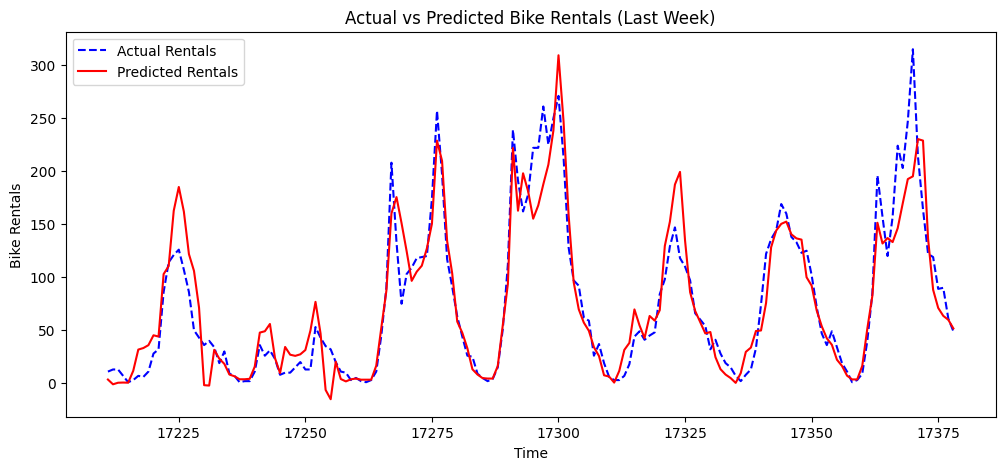

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test.values, label="Actual Rentals", color="blue", linestyle="dashed")
plt.plot(y_test.index, y_pred_xgb, label="Predicted Rentals", color="red")
plt.title("Actual vs Predicted Bike Rentals (Last Week)")
plt.xlabel("Time")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()


now just to evaluate rmse and r2 

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("Test RMSE: ", rmse)
print("test r2: ", r2)

Test RMSE:  26.38441276550293
test r2:  0.867483377456665


looking at both the rmse, r2 and the graph above its safe to say that the predictive model is accurate at predicting bike rentals, it can predict around 85% of variance in bike sales, which is fairly high 